In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [34]:
df_all = pd.read_csv('OPOM_tested.csv')
df_diag = pd.read_excel('3. DIAGNOSIS_blindedSep28.xlsx')

In [35]:
df_all.head()
#df_all['MELD']

,Unnamed: 0,CREAT,BILT,ALB,MELD,INR,Na,pCREAT,pBILT,pALB,...,eCREAT,eINR,SUBJECT_ID,Live,P_DIAG_DESCR,SEC_DIAG_DESCR,Drop_3M,MELD_prob,MELD_Na,MELD_Na_prob
0,1,177.0,0.818713,3.7,15.0,1.20,137.0,123.0,0.467836,3.6,...,2.247973,0.079181,1,1,Nonalcoholic steatohepatitis (NASH),Unknown,0,0.060,17.0,0.060
1,2,119.0,0.760234,3.5,11.0,1.20,140.0,177.0,0.818713,3.7,...,2.075547,0.079181,1,1,Nonalcoholic steatohepatitis (NASH),Unknown,0,0.060,11.0,0.060
2,3,97.0,0.701754,3.3,7.0,0.97,137.0,119.0,0.760234,3.5,...,1.986772,-0.013228,1,1,Nonalcoholic steatohepatitis (NASH),Unknown,0,0.019,9.0,0.019
3,4,95.0,0.643275,3.7,8.0,1.10,140.0,97.0,0.701754,3.3,...,1.977724,0.041393,1,1,Nonalcoholic steatohepatitis (NASH),Unknown,0,0.019,8.0,0.019
4,5,86.0,0.584795,3.6,7.0,1.02,137.0,95.0,0.643275,3.7,...,1.934498,0.008600,1,1,Nonalcoholic steatohepatitis (NASH),Unknown,0,0.019,9.0,0.019


In [36]:
df_all.shape

(56684, 35)

In [37]:
!pip install ipynb

In [38]:
from ipynb.fs.full.MyFunctions import OPOMTree
import pandas as pd
from ipynb.fs.full.MyFunctions import get_split
from ipynb.fs.full.MyFunctions import getCountRate
from ipynb.fs.full.MyFunctions import ROC_AUC

55.0
for 100% patient stratum (56684 in total)


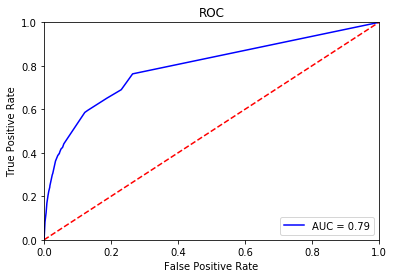

for 80% patient stratum (9968 in total)


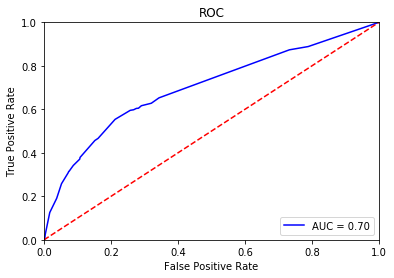

for 60% patient stratum (1666 in total)


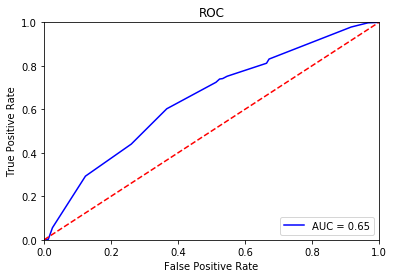

for 40% patient stratum (314 in total)


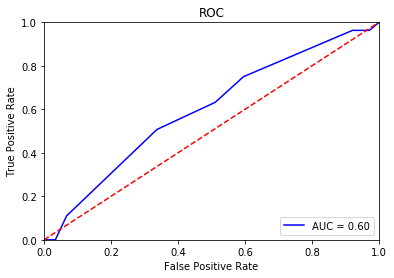

for 20% patient stratum (27 in total)


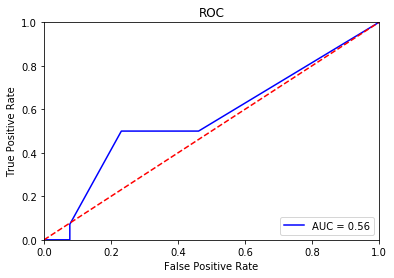

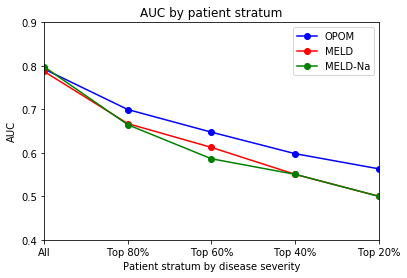

In [39]:
# Stratify patients by MELD
MELDRange = df_all.MELD.max() - df_all.MELD.min()
print(MELDRange)

#y_true, scores = OPOMTree(df)
#AUC = ROC_AUC(y_true, scores)

patientStra = [100, 80, 60, 40, 20]
OPOMAUC = []
meldAUC = []
meldNaAUC =[]

for c, value in enumerate(patientStra):
    # sratify patients based on their MELD scores
    minMeld = df_all.MELD.min() + MELDRange * (1-value/100)
    
    newdf = df_all[df_all.MELD >= minMeld]
    print('for {}% patient stratum ({} in total)'.format(value, len(newdf)))
    
    y_true, scores = OPOMTree(newdf)
    opom = ROC_AUC(y_true, scores) # draw ROC curve
    OPOMAUC.append(opom)
    
    y_true_meld = newdf['Drop_3M']
    y_pred_meld = newdf['MELD_prob']
    fpr, tpr, thresholds = metrics.roc_curve(y_true_meld, y_pred_meld, pos_label=1)
    meld = metrics.roc_auc_score(y_true_meld, y_pred_meld)
    meldAUC.append(meld)
    
    y_true_na = np.array(newdf['Drop_3M'])
    y_pred_na = np.array(newdf['MELD_Na_prob'])
    fpr, tpr, thresh = metrics.roc_curve(y_true_na, y_pred_na, pos_label=1)
    meldNa = metrics.roc_auc_score(y_true_na, y_pred_na)
    meldNaAUC.append(meldNa)

plt.figure()

plt.plot(patientStra, OPOMAUC, 'bo-', label='OPOM')
plt.plot(patientStra, meldAUC, 'ro-', label = 'MELD')
plt.plot(patientStra, meldNaAUC, 'go-', label = 'MELD-Na')
plt.legend(loc = 'upper right')
plt.xticks([100, 80, 60, 40, 20, 5],["All","Top 80%","Top 60%","Top 40%","Top 20%","Top 5%"])
plt.ylim(0.4, 0.9)
plt.xlim(100, 20)
plt.title('AUC by patient stratum')
plt.xlabel('Patient stratum by disease severity')
plt.ylabel('AUC')
plt.show()

In [40]:
df_TIPS = df_diag.loc[(df_diag['TIPS'] == 1)] 
df_ENC = df_diag.loc[df_diag['ENCEPHALOPATHY']==1]
df_VAR = df_diag.loc[df_diag['VARICES']==1]
df_ASC = df_diag.loc[df_diag['ASCITES']==1]

In [24]:
df_ALL = pd.concat([df_TIPS, df_ENC, df_VAR, df_ASC])

In [25]:
df_ALL.shape

(2718, 8)

In [26]:
df_TIPS = df_TIPS.join(df_all, on=df_TIPS.SUBJECT_ID, how='inner', lsuffix='', rsuffix='_y')
df_TIPS.shape
# 23 rows

(23, 44)

In [27]:
df_ENC = df_ENC.join(df_all, on=df_ENC.SUBJECT_ID, how='inner', lsuffix='', rsuffix='_y')
df_ENC.shape
#748 ROWS

(748, 44)

In [28]:
df_VAR = df_VAR.join(df_all, on=df_VAR.SUBJECT_ID, how='inner', lsuffix='', rsuffix='_y')
df_VAR.shape
#909 ROWS

(909, 44)

In [29]:
df_ASC = df_ASC.join(df_all, on=df_ASC.SUBJECT_ID, how='inner', lsuffix='', rsuffix='_y')
df_ASC.shape
#1038 rows

(1038, 44)

In [13]:
df_ALL = df_ALL.join(df_all, on=df_ALL.SUBJECT_ID, how='inner', lsuffix='', rsuffix='_y')
df_ALL.shape
#2718 rows

NameError: name 'df_ALL' is not defined

In [30]:
##

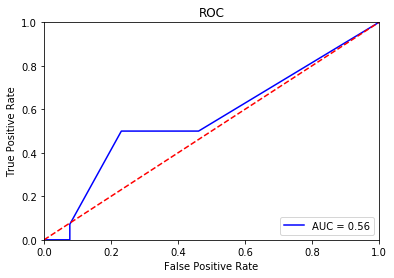

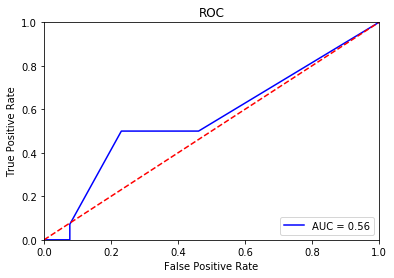

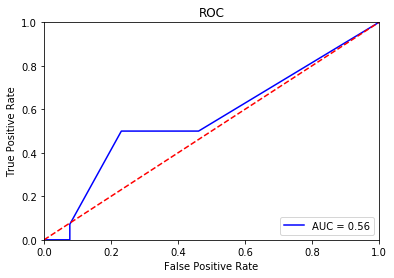

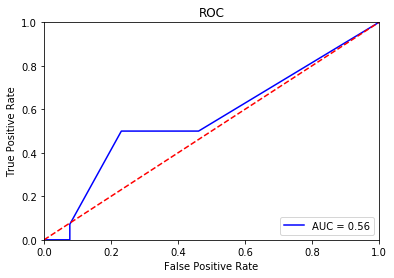

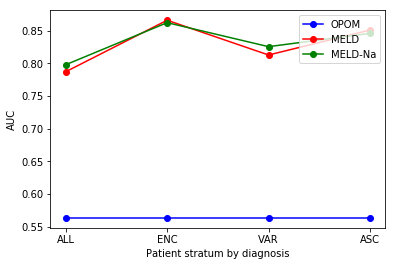

In [31]:

OPOMAUC = []
meldAUC = []
meldNaAUC =[]
    
def threeAUC(newdf, OPOMAUC, meldAUC, meldNaAUC):
    y_true_opom, y_pred_opom = OPOMTree(newdf)
    opom = ROC_AUC(y_true, scores)
    fpr_opom, tpr_opom, thresholds = metrics.roc_curve(y_true_opom, y_pred_opom, pos_label=1)
    OPOMAUC.append(opom)

    y_true_meld = newdf['Drop_3M']
    y_pred_meld = newdf['MELD_prob']
    fpr_meld, tpr_meld, thresholds_meld = metrics.roc_curve(y_true_meld, y_pred_meld, pos_label=1)
    meld = metrics.roc_auc_score(y_true_meld, y_pred_meld)
    meldAUC.append(meld)

    y_true_na = np.array(newdf['Drop_3M'])
    y_pred_na = np.array(newdf['MELD_Na_prob'])
    fpr_meldna, tpr_meldna, threshold_meldna = metrics.roc_curve(y_true_na, y_pred_na, pos_label=1)
    meldNa = metrics.roc_auc_score(y_true_na, y_pred_na)
    meldNaAUC.append(meldNa)    
    
    return OPOMAUC, meldAUC, meldNaAUC

OPOMAUC, meldAUC, meldNaAUC = threeAUC(df_all, OPOMAUC, meldAUC, meldNaAUC)
#OPOMAUC, meldAUC, meldNaAUC = threeAUC(df_TIPS, OPOMAUC, meldAUC, meldNaAUC)
OPOMAUC, meldAUC, meldNaAUC = threeAUC(df_ENC, OPOMAUC, meldAUC, meldNaAUC)
OPOMAUC, meldAUC, meldNaAUC = threeAUC(df_VAR, OPOMAUC, meldAUC, meldNaAUC)
OPOMAUC, meldAUC, meldNaAUC = threeAUC(df_ASC, OPOMAUC, meldAUC, meldNaAUC)


plt.figure()

patientDiag = [0,1,2,3] #,4

plt.plot(patientDiag, OPOMAUC, 'bo-', label='OPOM')
plt.plot(patientDiag, meldAUC, 'ro-', label = 'MELD')
plt.plot(patientDiag, meldNaAUC, 'go-', label = 'MELD-Na')
plt.legend(loc = 'upper right')
plt.xticks(patientDiag, ["ALL", "ENC","VAR","ASC"]) 
#plt.ylim(0.4, 1)
#plt.xlim(100, 20)
plt.xlabel('Patient stratum by diagnosis')
plt.ylabel('AUC')
plt.show()

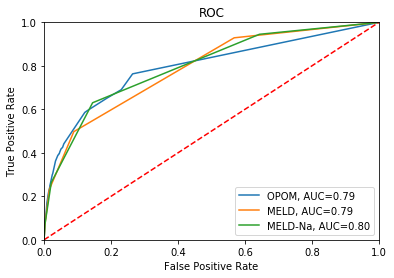

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#MELD
y_true_meld = df_all['Drop_3M']
y_pred_meld = df_all['MELD_prob']
fpr_meld, tpr_meld, thresholds = metrics.roc_curve(y_true_meld, y_pred_meld, pos_label=1)
AUC_meld = roc_auc_score(y_true_meld, y_pred_meld)

#MELD_Na
y_true_na = np.array(df_all['Drop_3M'])
y_pred_na = np.array(df_all['MELD_Na_prob'])
fpr_meldna, tpr_meldna, thresh = metrics.roc_curve(y_true_na, y_pred_na, pos_label=1)
AUC_meldna = roc_auc_score(y_true_na, y_pred_na)

#OPOM 
y_true_opom, y_pred_opom = OPOMTree(df_all)
fpr_opom, tpr_opom, thresholds = metrics.roc_curve(y_true_opom, y_pred_opom, pos_label=1)
#roc_auc = metrics.auc(fpr, tpr)
AUC_opom = roc_auc_score(y_true_opom, y_pred_opom)

plt.figure(0)
plt.title('ROC')

plt.plot(fpr_opom,tpr_opom,label="OPOM, AUC=%0.2f" % AUC_opom)
plt.plot(fpr_meld,tpr_meld,label="MELD, AUC=%0.2f" % AUC_meld)
plt.plot(fpr_meldna,tpr_meldna,label="MELD-Na, AUC=%0.2f" % AUC_meldna)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
OPOMAUC
#meldAUC

[0.7927126329675999,
 0.6995668118858445,
 0.6474519498309148,
 0.5980254461335096,
 0.5631868131868132]

<Figure size 432x288 with 0 Axes>

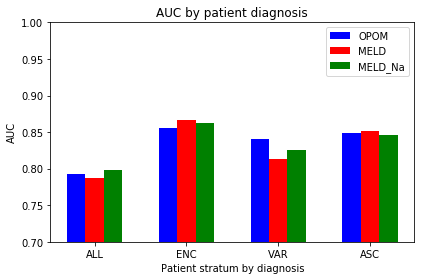

In [21]:
plt.figure()

#patientDiag = [0,1,2,3,4]

#plt.plot(patientDiag, OPOMAUC, 'bo-', label='OPOM')
#plt.plot(patientDiag, meldAUC, 'ro-', label = 'MELD')
#plt.plot(patientDiag, meldNaAUC, 'go-', label = 'MELD-Na')

n_groups=4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width=0.2

rects1 = ax.bar(index, OPOMAUC, bar_width,
                color='b', label='OPOM')
rects2 = ax.bar(index+bar_width, meldAUC, bar_width,
                color='r', label='MELD')
rects3 = ax.bar(index+2*bar_width, meldNaAUC, bar_width,
                color='g', label='MELD_Na')

ax.set_xlabel('Patient stratum by diagnosis')
ax.set_ylabel('AUC')
ax.set_title('AUC by patient diagnosis')
ax.legend(loc = 'upper right')
ax.set_xticks(index+bar_width)
ax.set_xticklabels(["ALL","ENC","VAR","ASC"]) #"TIPS",
plt.ylim(0.7, 1)

fig.tight_layout()
plt.show()
#plt.legend(loc = 'upper right')
#plt.xticks(np.arange(5), ["TIPS","ENC","VAR","ASC","ALL"]) 
#plt.ylim(0.4, 1)
#plt.xlim(100, 20)
#plt.xlabel('Patient stratum by diagnosis')
#plt.ylabel('AUC')
#plt.show()